#**BACKGROUND**

---


Data yang digunakan : https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

tujuan : klasifikasi bintang, galaksi dan quasar menggunakan beberapa algoritma supervised machine learning (Random Forest, Decision Tree, dan Logistic Regression)

Dataset terdiri dari 100.000 data pengamatan yang diambil dari SDSS (Sloan Digital Sky Survey). Setiap pengamatan terdiri dari 17 feature column dan 1 class yang mengidentifikasi bintang, galaksi, atau quasar.

**Penjelasan tiap kolom data**

1. obj_ID = Object Identifier, nilai yang mengidentifikasikan objek pada katalog gambar yang digunakan oleh CAS.
2. alpha = Asensiorekta, posisi bintang yang diukur dari titik aries pada koordinat ekuator.
3. delta = Deklinasi, posisi bintang yang diukur dari ekuator langit menuju kutub langit selatan atau utara.
4. u = Filter ultraungu yang dipasang pada kamera untuk pengukuran fotometri.
5. g = Green Filter, filter yang dipasang pada kamera untuk pengukuran fotometri.
6. r = Red filter yang dipasang pada kamera untuk pengukuran fotometri.
7. i = Near Infrared filter yang dipasang pada kamera untuk pengukuran fotometri.
8. z = Infrared filter yang dipasang pada kamera untuk pengukuran fotometri.
9. run_ID = Run Number,digunakan untuk identifikasi secara spesifik kamera pemindai gambar.
10. rerun_ID = Rerun Number, digunakan untuk spesifikasi bagaimana gambar diproses.
11. cam_col = Camera column, digunakan untuk identifikasi *scanline* di dalam run.
12. field_ID = Field number, digunakan untuk identifikasi ukuran bidang kamera.
13. spec_obj_ID = Nomor unik untuk objek spektrokopis optik. Dua pengamatan yang berbeda dengan *spec_obj_ID* sama akan menghasilkan output *class*.
14. class = Kelas objek, berisi GALAXY, STAR, atau QSO (Quasi-Star Object,  inti galaksi aktif yang sangat energetik dan sangat kuat).
15. redshift = redshift value, pergeseran cahaya ke arah spektrum yang lebih 'merah' atau panjang. Histogram pergeseran merah menunjukkan distribusi objek pada nilai pergeseran merah yang berbeda, yang dapat memberikan wawasan tentang struktur alam semesta dalam skala besar.
16. plate = plate ID, identifikasi setiap *plate* pada SDSS. Plates pada konteks SDSS adalah kepingan bulat aluminium dengan lubang untuk menghubungkan *fiber* yang mengumpulkan cahaya pada tiap objek astronomi.
17. MJD = Modified Julian Date, digunakan untuk mengidentifikasi kapan pengamatan dilakukan berdasarkan kalender Julian.
18. fiber_ID = fiber ID,identifikasi serat yang mengarahkan cahaya pada bidang fokus setiap pengamatan.

**Penjelasan kolom class (galaksi, bintang, dan quasar)**
1. Galaksi :
Kumpulan dari gas, debu, dan miliaran bintang yang bersatu padu karena tarikan gravitasi yang kuat dari inti galaksi.
2. Bintang :
Benda langit yang kebanyakan terdiri dari gas hidrogen dan helium dan mengalami reaksi fusi nuklir untuk menghasilkan cahaya dan panas.
3. Quasar :
Bisa disebut sebagai QSO (Quasi-Star Object) adalah inti galaksi yang aktif dan memancarkan cahaya dengan energi sangat tinggi.

# **IMPORT LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# **DATA LOADING**

---



In [ ]:
#load data
from google.colab import drive
drive.mount('/content/drive')
#membaca dataset
df = pd.read_csv('/content/drive/My Drive/archive/star_classification.csv')
#menampilkan 5 data teratas
df.head(5)

Mounted at /content/drive


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
#menambahkan imbuhan filter di depan kolom u, g, r, i, dan z
df.rename(columns = {'u' : 'filter_u',
                     'g' : 'filter_g',
                     'r' : 'filter_r',
                     'i' : 'filter_i',
                     'z' : 'filter_z'},
          inplace=True)
df.head()

obj_ID       alpha      delta  filter_u  filter_g  filter_r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

   filter_i  filter_z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
#menampilkan ukuran data
df.shape

(100000, 18)

## Mendeteksi missing value

In [ ]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
filter_u       0
filter_g       0
filter_r       0
filter_i       0
filter_z       0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Tidak terdapat missing values.

## Mendeteksi duplicated data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data yang terduplikasi.

## Melihat tipe data

In [ ]:
#tipe data
dict(df.dtypes)

{'obj_ID': dtype('float64'),
 'alpha': dtype('float64'),
 'delta': dtype('float64'),
 'filter_u': dtype('float64'),
 'filter_g': dtype('float64'),
 'filter_r': dtype('float64'),
 'filter_i': dtype('float64'),
 'filter_z': dtype('float64'),
 'run_ID': dtype('int64'),
 'rerun_ID': dtype('int64'),
 'cam_col': dtype('int64'),
 'field_ID': dtype('int64'),
 'spec_obj_ID': dtype('float64'),
 'class': dtype('O'),
 'redshift': dtype('float64'),
 'plate': dtype('int64'),
 'MJD': dtype('int64'),
 'fiber_ID': dtype('int64')}

Terdapat 17 data numerik dan 1 data objek/kategori, yakni *class*.

#**Exploratory Data Analysis**

---




## Persentase galaksi, bintang, dan quasar pada observasi.

<Axes: ylabel='class'>

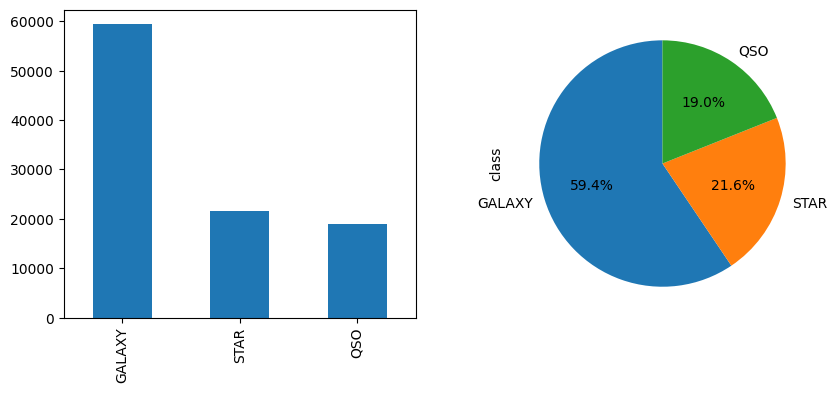

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['class'].value_counts().plot(kind='bar', ax=axs[0])
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

Dari 100.000 observasi, lebih dari setengah data merupakan data galaksi.

## Persebaran data pada koordinat langit

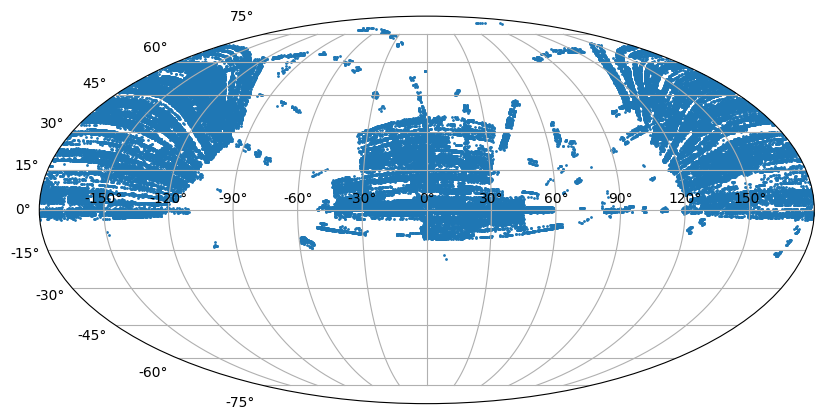

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
coords = SkyCoord(ra=df['alpha']*u.degree, dec=df['delta']*u.degree, frame='icrs')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, s=1)
ax.grid()
plt.show()

Terlihat pada peta koordinat langit di atas, hampir seluruh objek langit diamati pada daerah bumi bagian utara.

## Analisa statistik

In [ ]:
df.describe()

obj_ID          alpha          delta       filter_u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

            filter_g       filter_r       filter_i       filter_z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000



*   Filter u memiliki nilai rata-rata yang paling besar dibandingkan dengan filter lainnya (g, r, i, z)
*   Persebaran data yang terkecil adalah redshift.

*   Kolom rerun_ID memiliki standar deviasi nol karena semua citra pengamatan dilakukan dengan proses yang sama.

## Visualisasi setiap kolom numerik

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>,
        <Axes: title={'center': 'filter_u'}>],
       [<Axes: title={'center': 'filter_g'}>,
        <Axes: title={'center': 'filter_r'}>,
        <Axes: title={'center': 'filter_i'}>,
        <Axes: title={'center': 'filter_z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

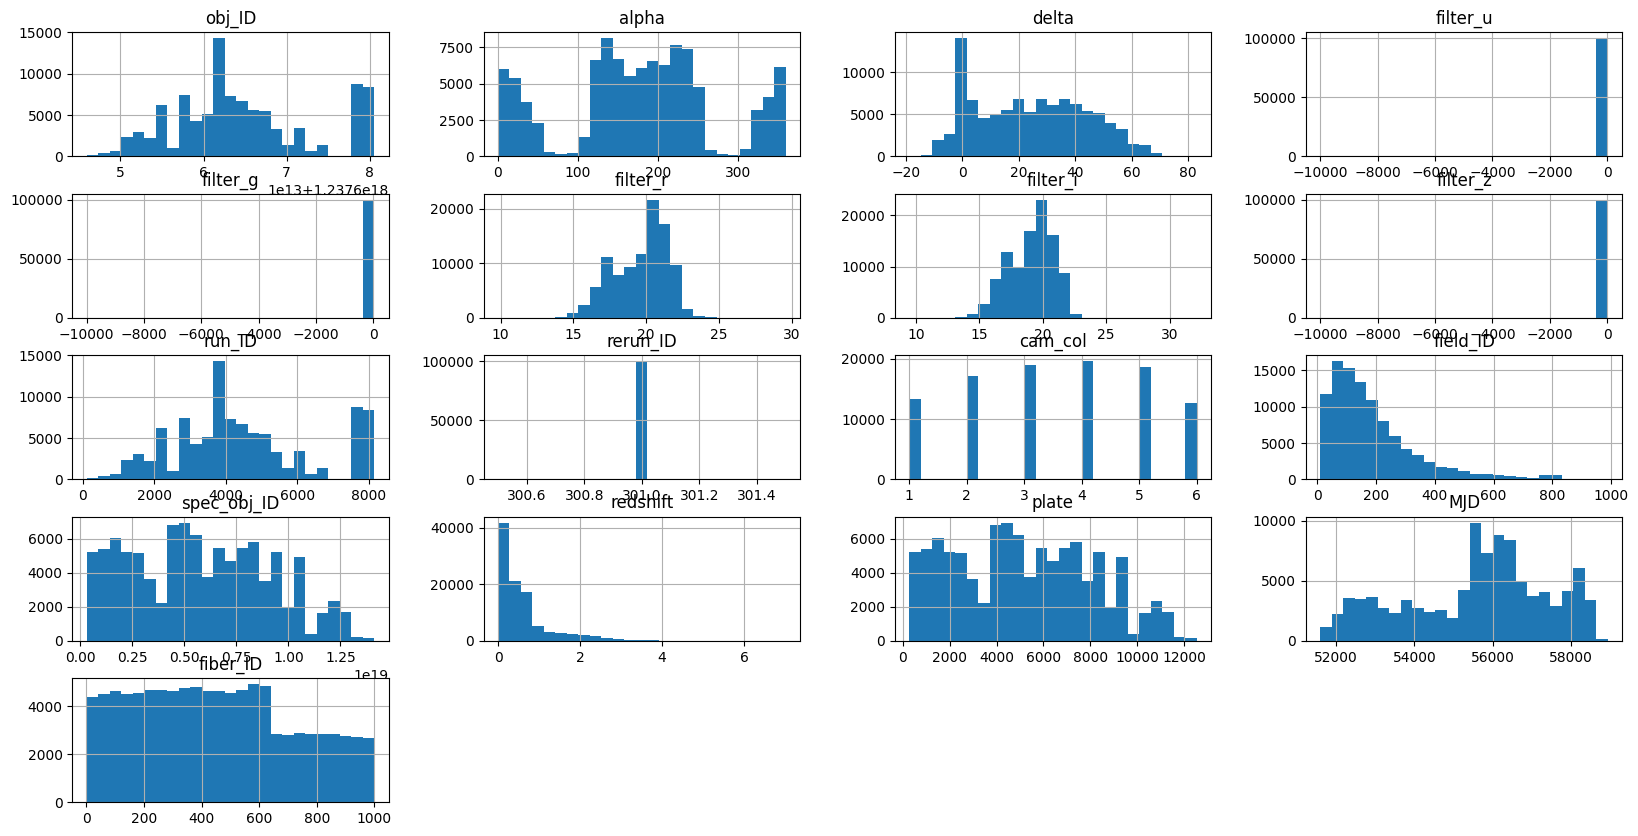

In [ ]:
featuredf = df.drop(['class'], axis=1)
featuredf.hist(bins=25, figsize=(20,10))

Analisa statistik dalam bentuk gambar atau diagram batang.

## Density distribution

<ipython-input-12-b396988c48af>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(


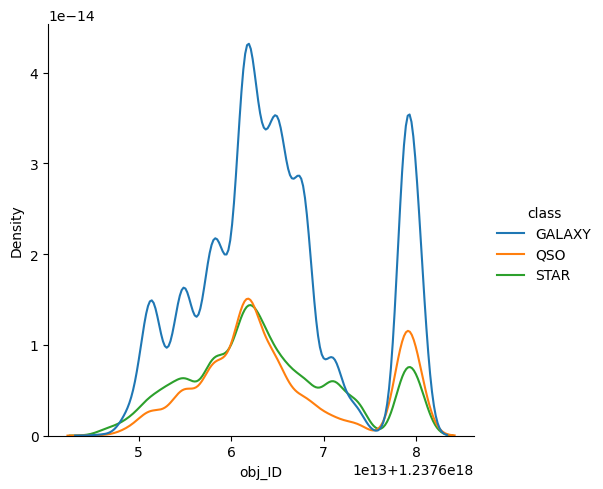

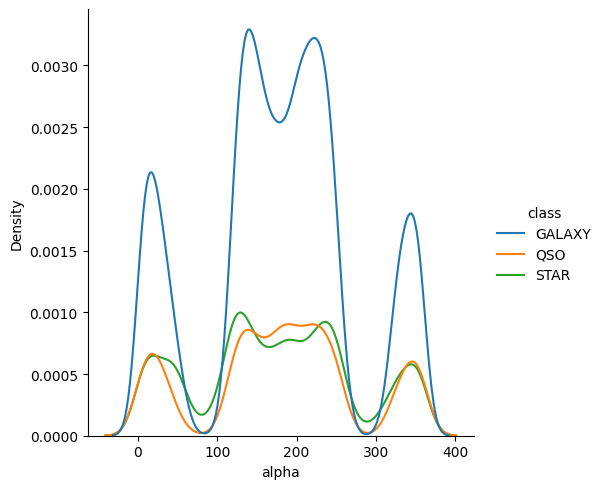

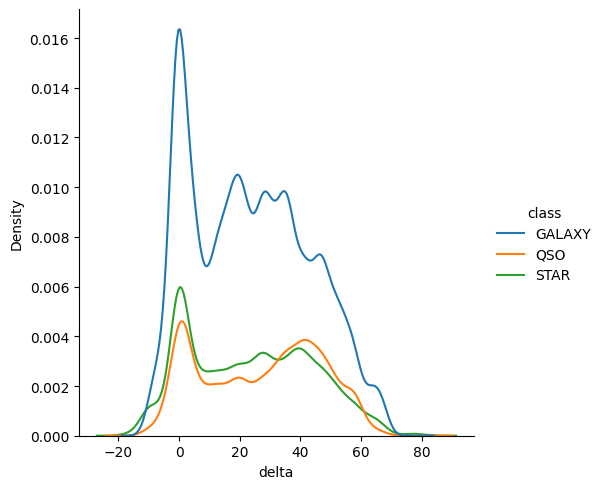

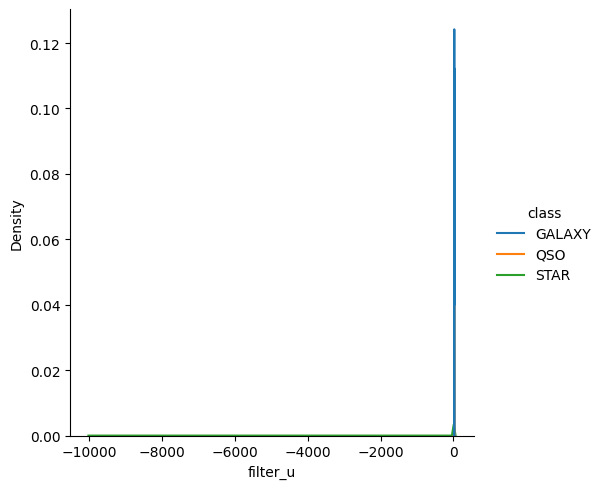

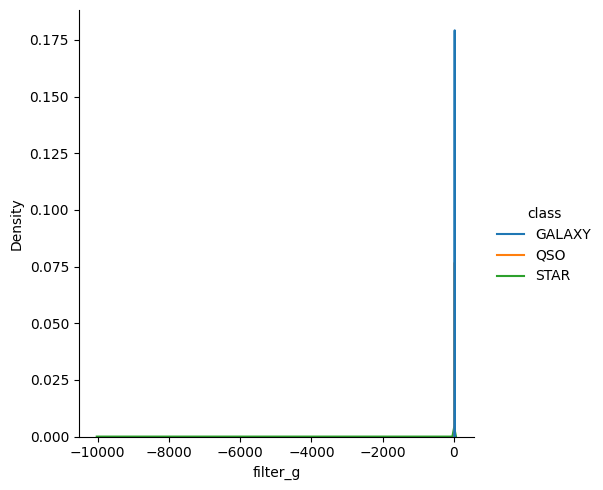

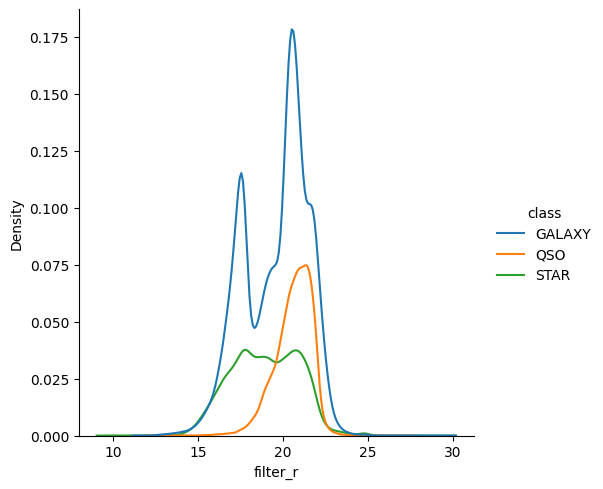

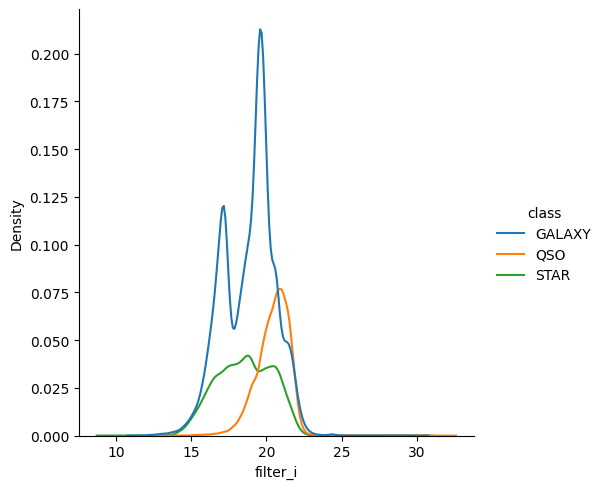

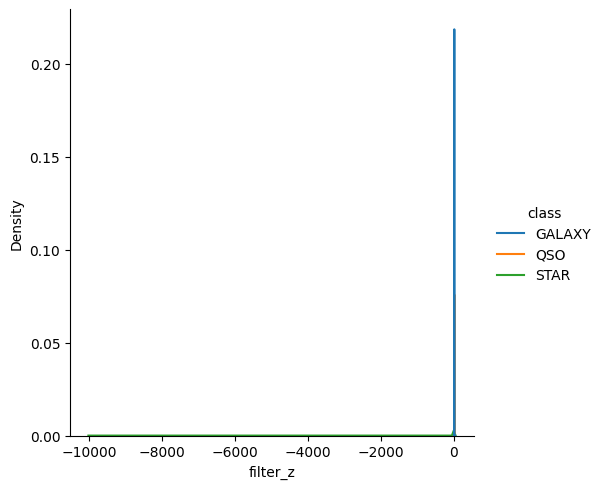

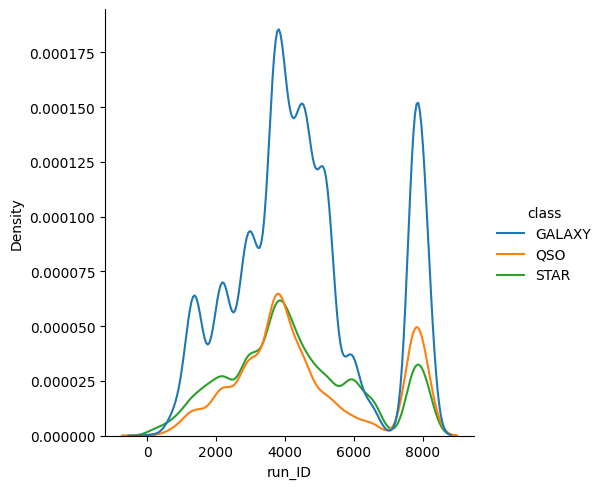

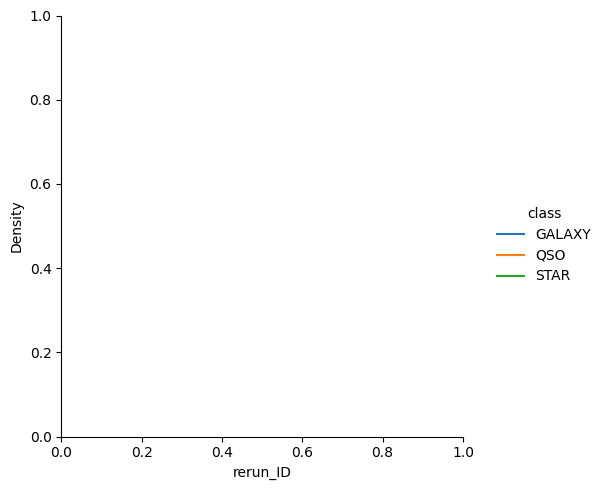

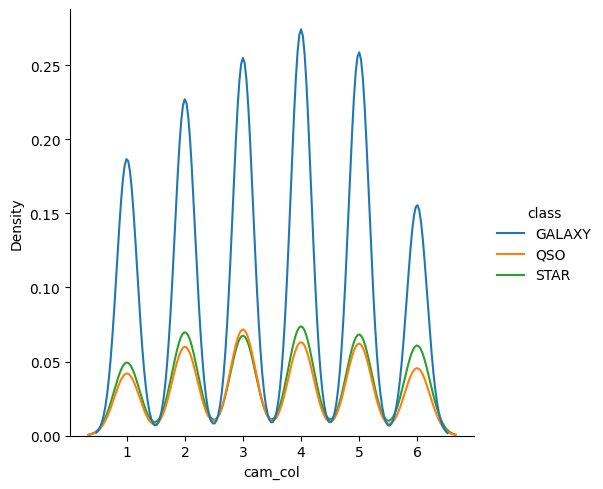

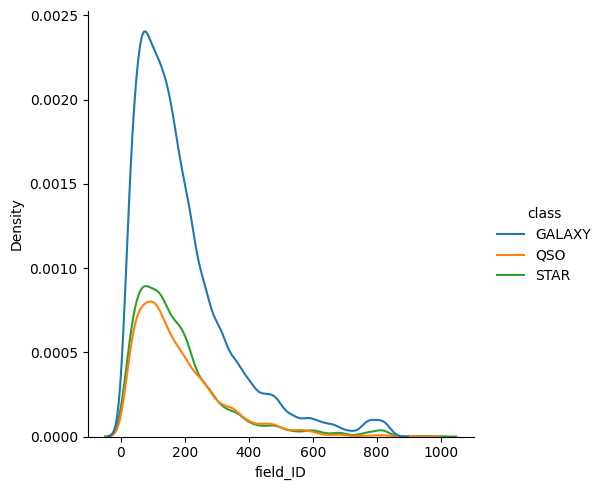

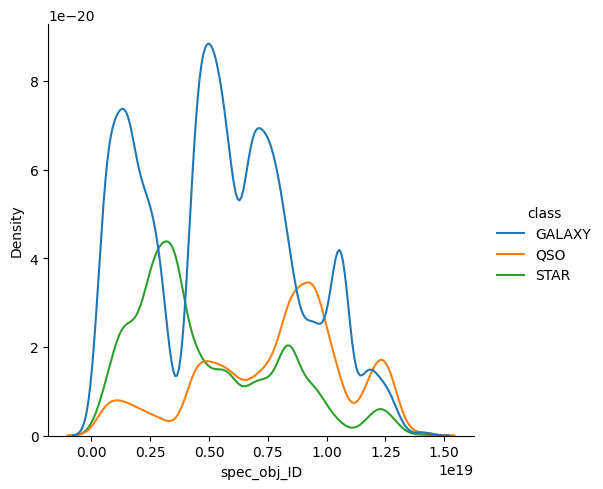

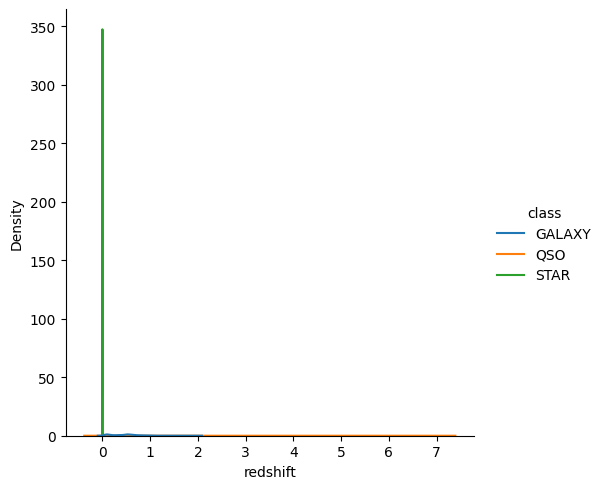

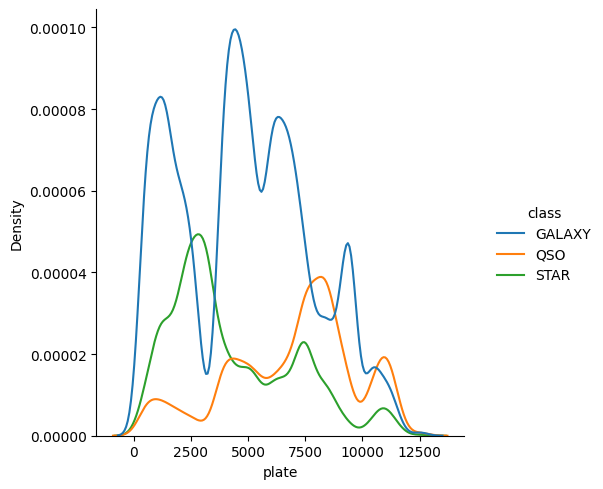

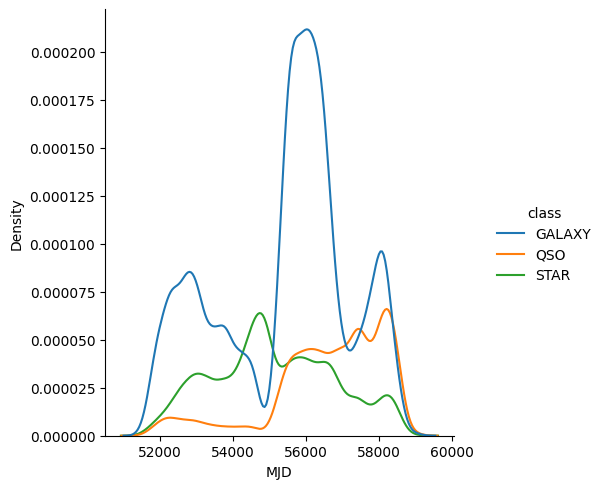

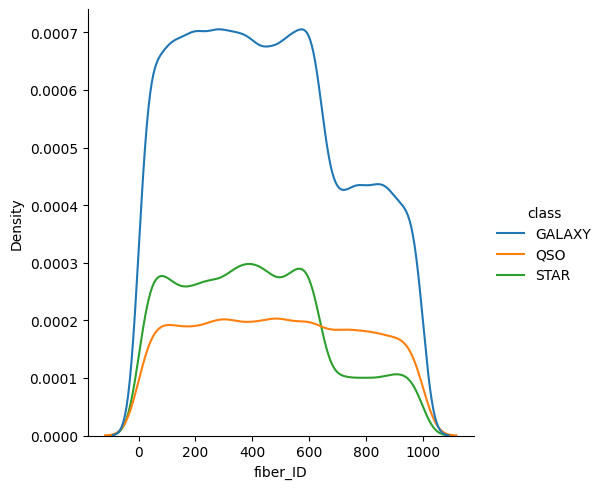

In [ ]:
#plot distribusi densitas pada setiap kolom terhadap class
featurecols = list(featuredf)
for i in range(len(featurecols)) :
  g = sns.displot(
      data=df, x=featurecols[i], hue="class",
      kind="kde")

Data redshift memiliki standar deviasi yang sangat kecil. Redshift pada bintang densitasnya sangat tinggi, namun rentang nilai redshiftnya sangat kecil mendekati nol. Sementara itu, redshift pada galaksi dan quasar densitasnya sangat kecil mendekati nol, namun rentang nilai redshiftnya lebih lebar. Histogram pergeseran merah menunjukkan distribusi objek pada nilai pergeseran merah yang berbeda, yang dapat memberikan wawasan tentang struktur alam semesta dalam skala besar.

## Declination VS Redshift

In [ ]:
fig = px.scatter(df, x='delta', y='redshift', color='class', color_discrete_sequence=px.colors.qualitative.Dark2, hover_name='obj_ID', width=900, height=500)
fig.update_layout(title='Declination Angle vs Redshift', xaxis_title='Declination Angle', yaxis_title='Redshift')
fig.show()

## Right Ascension VS Redshift

In [ ]:
fig = px.scatter(df, x="alpha", y="redshift", color="class", title="Right Ascension angle vs Redshift",
                 labels={"alpha": "Right Ascension Angle", "redshift": "Redshift"},
                 color_discrete_sequence=px.colors.qualitative.Dark24,  width=900, height=500)
fig.show()

Dari dua scatter plot di atas terlihat bahwa quasar memiliki redshift paling menyebar dibandingkan dengan galaksi dan bintang. Artinya, quasar sangat cepat 'menjauhi' kita/pengamat atau hal ini juga berarti jaraknya sangat jauh dari kita.

## Filter band densities

<ipython-input-15-c6b576726473>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-c6b576726473>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new 

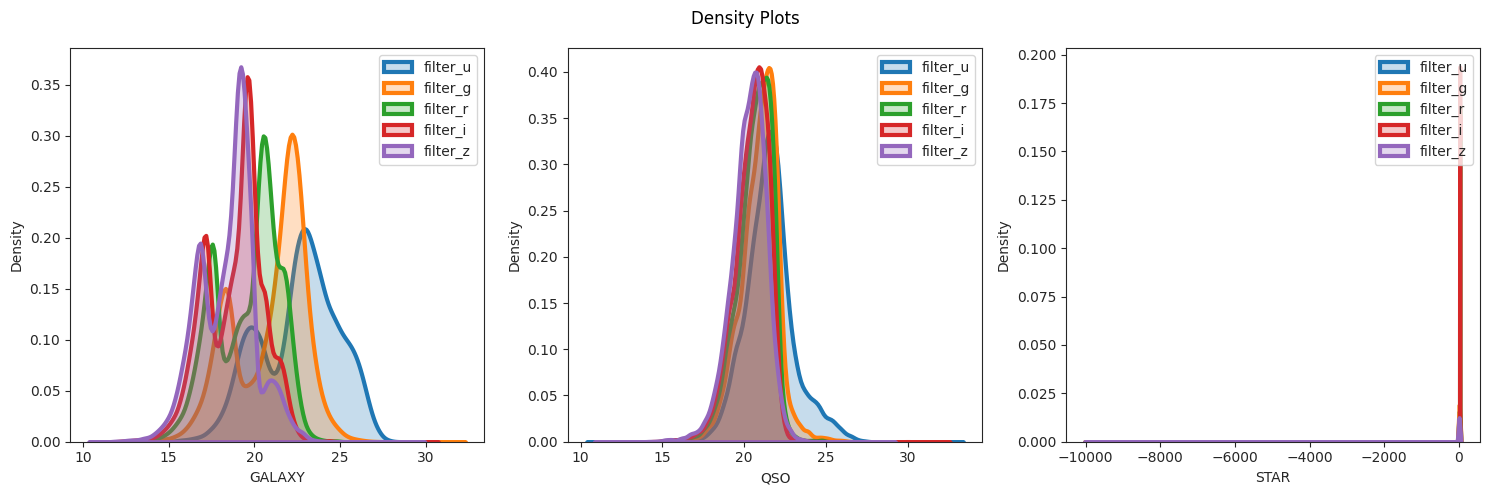

In [ ]:
featuredf2 = df.iloc[:,3:8] #data filter u, g, r, i, z
featurecols2 = list(featuredf2)
astrObjs = df['class'].unique()
filterbands = pd.concat([df.iloc[:,3:8], df['class']],axis=1)
plt.figure(figsize=(15,5))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for i in range(len(astrObjs)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols2)):
        sns.distplot(df[df['class']==astrObjs[i]][featurecols2[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = featurecols2[j])
    plt.legend()
    plt.xlabel(astrObjs[i])
    plt.ylabel('Density')
plt.tight_layout()

Outlier data filter (u, g, r, i, z) paling banyak adalah pada data bintang.

## Kesimpulan EDA
- Bintang memiliki nilai redshift paling kecil dibandingkan galaksi dan quasar.
- Banyak outlier di filter, terutama u, z dan g

# **DATA PREPROCESSING**

---



## Drop data yang tidak dibutuhkan


Klasifikasi didasarkan pada fotometri, yakni pengamatan pada panjang gelombang yang bervariasi menggunakan kamera yang memiliki nilai *plate* berbeda pada waktu tertentu. Pada data pengamatan digunakan filter u, g, r, i, dan z. Jadi, kolom 'obj_ID', 'alpha', 'delta', run_ID','rerun_ID','cam_col','field_ID', 'spec_obj_id''fiber_ID' akan di-*drop*.

In [ ]:
df_drop = df.drop(['obj_ID','run_ID', 'alpha', 'delta', 'cam_col', 'rerun_ID', 'spec_obj_ID','field_ID','fiber_ID'], axis=1, inplace=True)
df.head()

filter_u  filter_g  filter_r  filter_i  filter_z   class  redshift  plate  \
0  23.87882  22.27530  20.39501  19.16573  18.79371  GALAXY  0.634794   5812   
1  24.77759  22.83188  22.58444  21.16812  21.61427  GALAXY  0.779136  10445   
2  25.26307  22.66389  20.60976  19.34857  18.94827  GALAXY  0.644195   4576   
3  22.13682  23.77656  21.61162  20.50454  19.25010  GALAXY  0.932346   9149   
4  19.43718  17.58028  16.49747  15.97711  15.54461  GALAXY  0.116123   6121   

     MJD  
0  56354  
1  58158  
2  55592  
3  58039  
4  56187

## Memisahkan data target, numerik, dan non numerik

In [ ]:
'''
Mengubah type variabel class ke numerik agar bisa diliat korelasinya dalam
heatmap

'''

df['class'].replace(['GALAXY', 'STAR', 'QSO'],[0, 1, 2], inplace=True)
df

filter_u  filter_g  filter_r  filter_i  filter_z  class  redshift  \
0      23.87882  22.27530  20.39501  19.16573  18.79371      0  0.634794   
1      24.77759  22.83188  22.58444  21.16812  21.61427      0  0.779136   
2      25.26307  22.66389  20.60976  19.34857  18.94827      0  0.644195   
3      22.13682  23.77656  21.61162  20.50454  19.25010      0  0.932346   
4      19.43718  17.58028  16.49747  15.97711  15.54461      0  0.116123   
...         ...       ...       ...       ...       ...    ...       ...   
99995  22.16759  22.97586  21.90404  21.30548  20.73569      0  0.000000   
99996  22.69118  22.38628  20.45003  19.75759  19.41526      0  0.404895   
99997  21.16916  19.26997  18.20428  17.69034  17.35221      0  0.143366   
99998  25.35039  21.63757  19.91386  19.07254  18.62482      0  0.455040   
99999  22.62171  21.79745  20.60115  20.00959  19.28075      0  0.542944   

       plate    MJD  
0       5812  56354  
1      10445  58158  
2       4576  55592  
3       9149  58039  
4       6121  56187  
...      ...    ...  
99995   9374  57749  
99996   7626  56934  
99997   2764  54535  
99998   6751  56368  
99999   7410  57104  

[100000 rows x 9 columns]

In [ ]:
#mengubah data menjadi numerik
df['class'] = pd.to_numeric(df['class'])

In [ ]:
dict(df.dtypes)

{'filter_u': dtype('float64'),
 'filter_g': dtype('float64'),
 'filter_r': dtype('float64'),
 'filter_i': dtype('float64'),
 'filter_z': dtype('float64'),
 'class': dtype('int64'),
 'redshift': dtype('float64'),
 'plate': dtype('int64'),
 'MJD': dtype('int64')}

## Visualisasi distribusi data pada data numerik

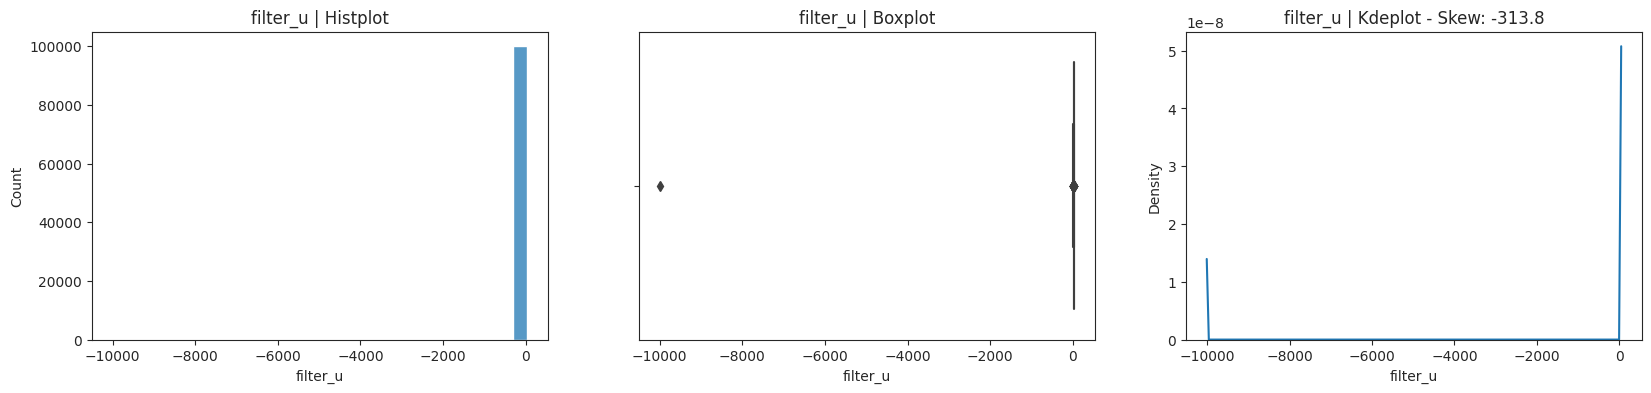

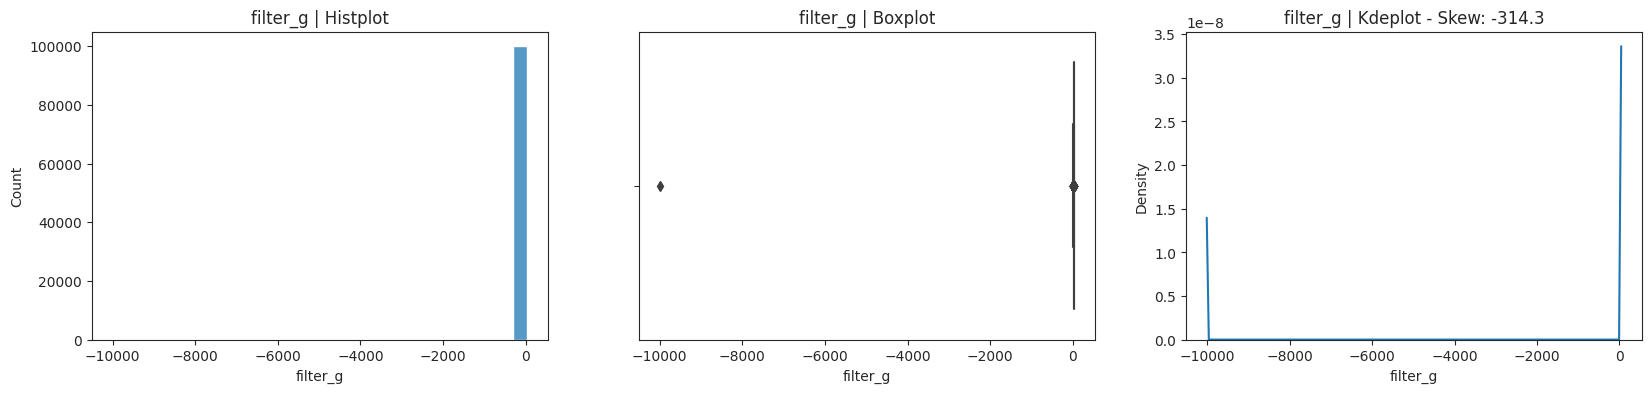

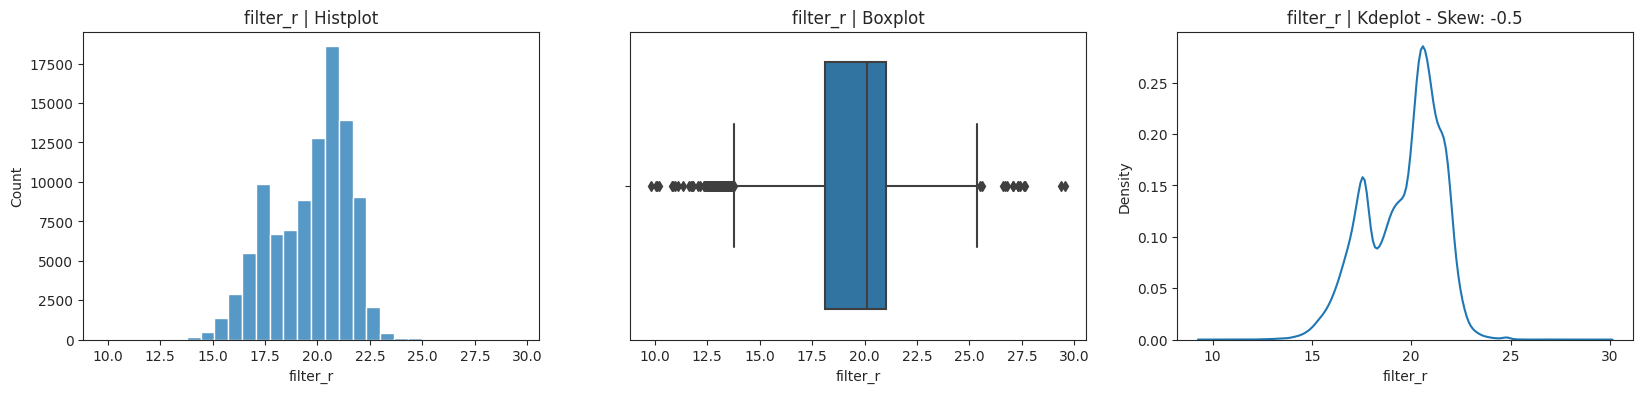

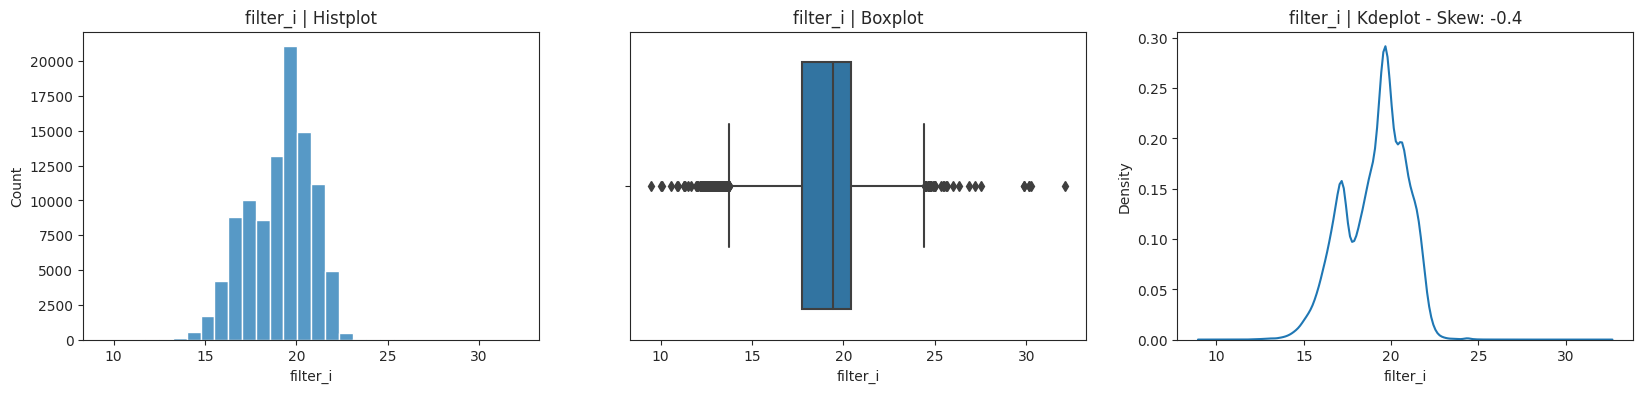

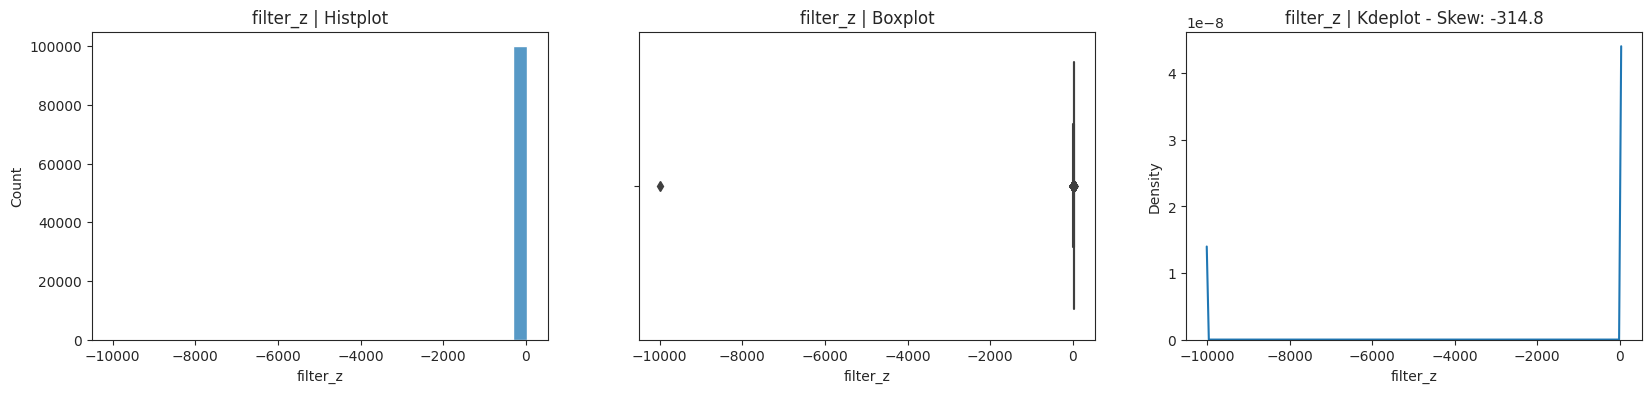

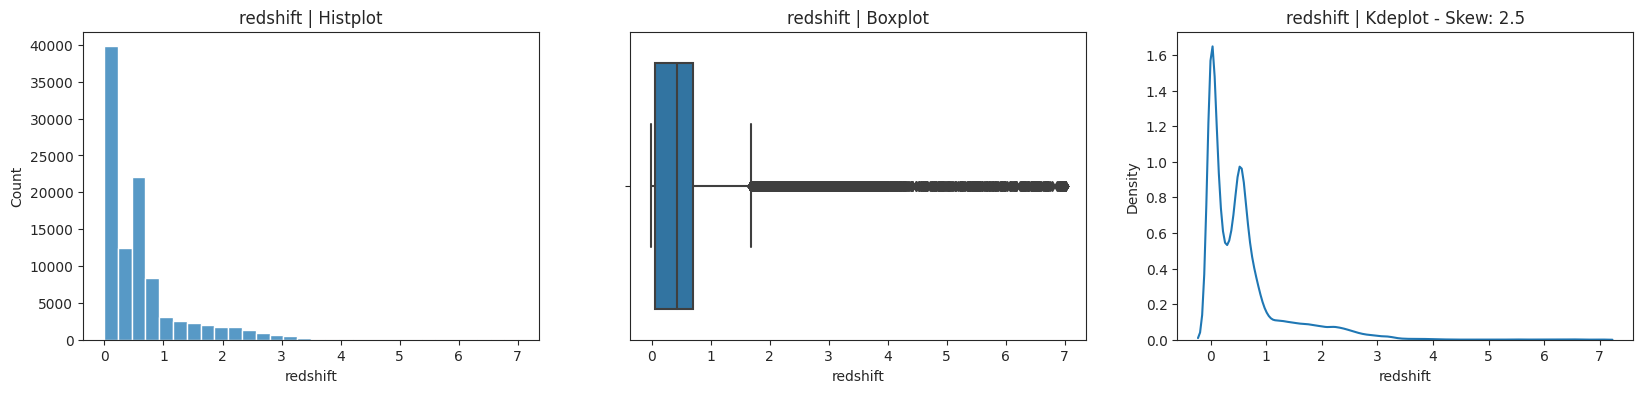

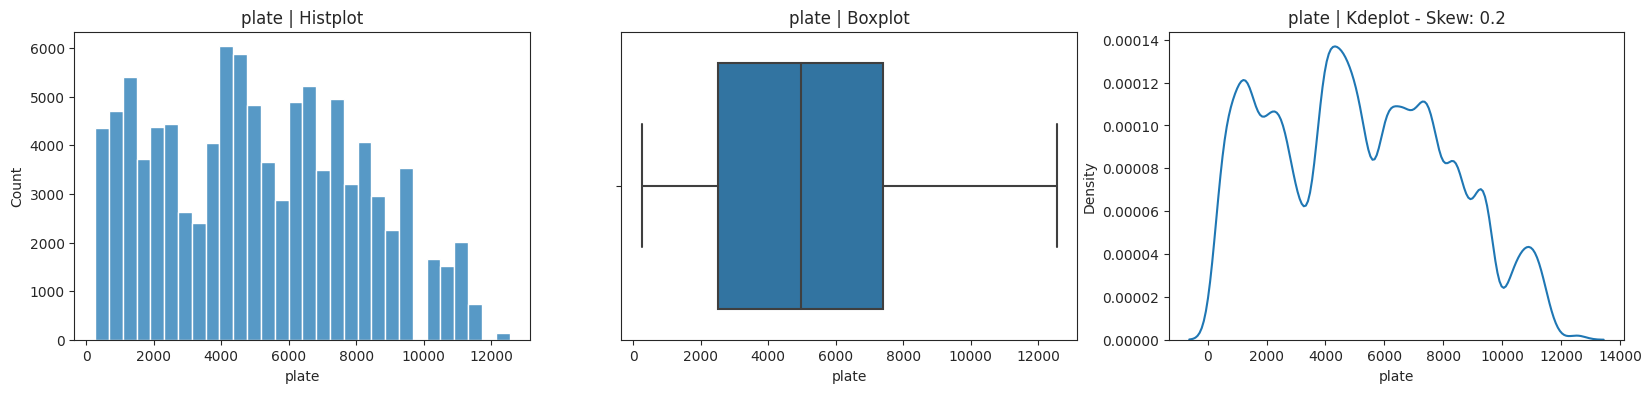

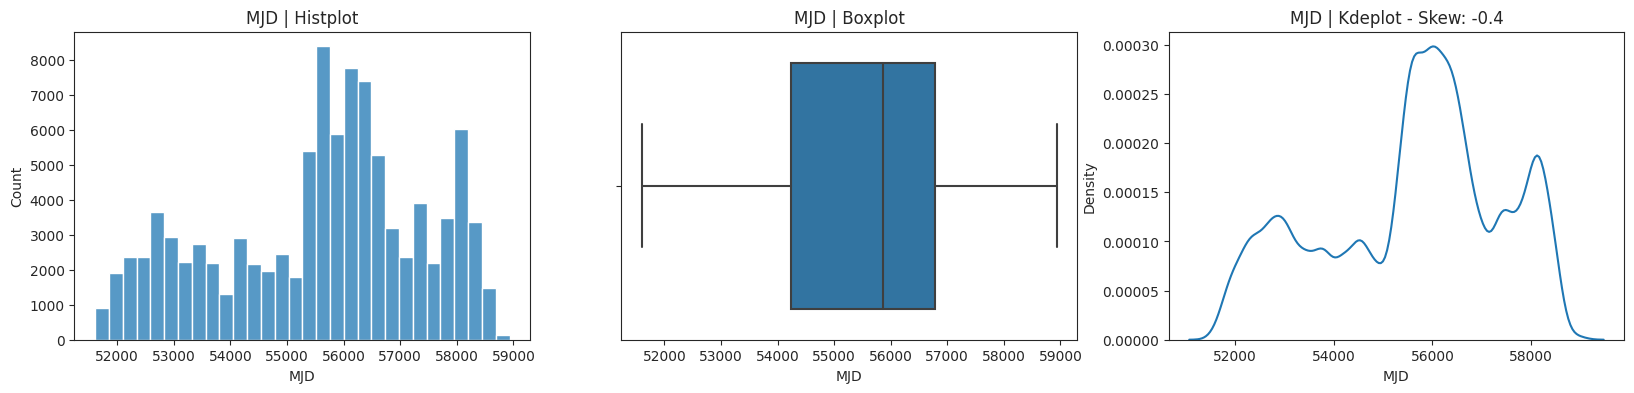

In [ ]:
df_without_class = df.drop(columns='class')
for i in df_without_class.columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=featuredf[i],ax=ax[0], bins=30)
    sns.boxplot(x=featuredf[i], ax=ax[1])
    sns.kdeplot(featuredf[i], ax=ax[2])
    skew_val=round(featuredf[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

- Terlihat bahwa terdapat nilai ekstrim pada u, g, dan z
- Pada data r, dan i distribusi datanya cenderung normal dengan outlier di atas dan bawah
- Pada data redshift, distribusi datanya condong ke kiri dengan outlier di atas nilai maksimal.

## Encoding fitur kategorik

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

## Heatmap correlation

<Axes: >

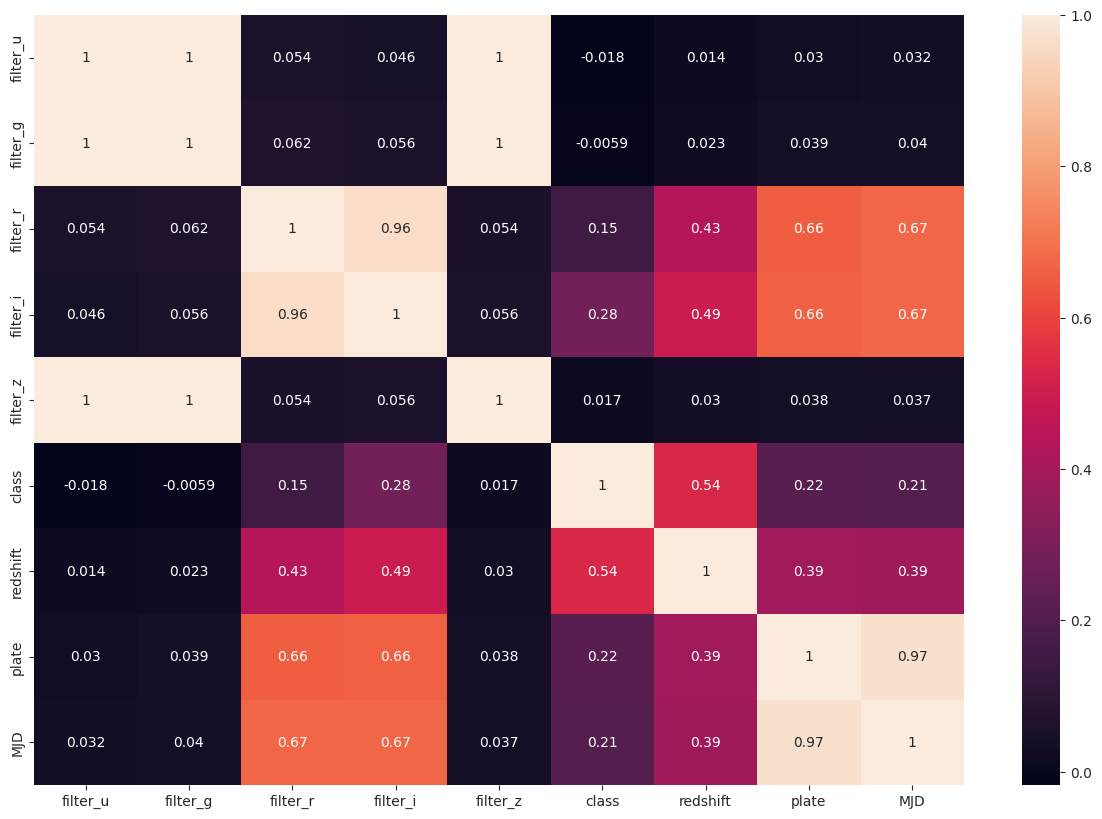

In [ ]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

- filter r dan i berkorelasi positif
- redshift paling berkorelasi dengan target class

## Data Cleaning

In [ ]:
#menghapus data outlier dengan metode IQR
def rem_outliers():
    s1 = df.shape

    for i in df.select_dtypes(include = 'number').columns:
        qt1 = df[i].quantile(0.25)
        qt3 = df[i].quantile(0.75)
        iqr =  qt3 - qt1
        lower = qt1-(1.5*iqr)
        upper = qt3+(1.5*iqr)
        min_in = df[df[i]<lower].index
        max_in = df[df[i]>upper].index
        df.drop(min_in, inplace = True)
        df.drop(max_in, inplace = True)

    s2 = df.shape
    outliers = s1[0] - s2[0]
    return outliers


In [ ]:
print("Number of outliers deleted are : ", rem_outliers())

Number of outliers deleted are :  9400


In [ ]:
#melihat ukuran data clean
df.shape

(90600, 9)

# **DATA MODELING**

---



## Training and test splits

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#split the data
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, shuffle=True, random_state=43)
#making a standarsize dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

## RANDOM FOREST ALGORITHM

In [ ]:
model1 = RandomForestClassifier(max_depth=7, random_state=30) #agar tidak overfitting gunakan max_depth = 5-10
model1.fit(X_train, y_train)
print('Random FOrest Classifier Trained')

Random FOrest Classifier Trained


### Training and testing score

In [ ]:
y_pred1 = model1.predict(X_test)
score1_train = model1.score(X_train, y_train)
score1_test = model1.score(X_test, y_test)

print('Training score : %.5f' % score1_train)
print('Testing score : %.5f' % score1_test)

Training score : 0.97014
Testing score : 0.96924


## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=5, random_state=0) #agar tidak overfitting gunakan max_depth = 5-10
model2 = model2.fit(X_train, y_train)
print('Decision Tree Trained')

Decision Tree Trained


### Training and testing score

In [ ]:
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
score2_train = model2.score(X_train, y_train)
score2_test = model2.score(X_test, y_test)

print('Training score : %.5f' % score2_train)
print('Testing score : %.5f' % score2_test)

Training score : 0.96260
Testing score : 0.96104


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)
print('Logistic Regression Trained')

Logistic Regression Trained


In [ ]:
y_pred3 = model3.predict(X_test)

score3_train = model3.score(X_train, y_train)
score3_test = model3.score(X_test, y_test)

print("Training score : %.5f" % score3_train)
print("Testing score : %.5f" % score3_test)

Training score : 0.95635
Testing score : 0.95622


# **EVALUASI MODEL**

---



## RANDOM FOREST ALOGIRTHM

### Confusion Matrix

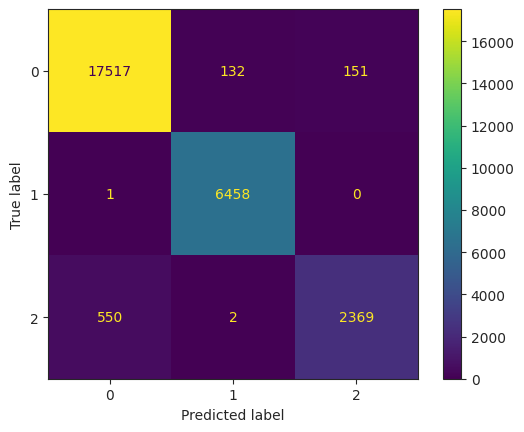

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cfm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

Dari confusion matrix di atas dapat disimpulkan bahwa :
- Terdapat 17.517 data galaksi yang diprediksi benar sebagai galaksi, 132 data galaksi yang diprediksi sebagai bintang, dan 151 data galaksi yang diprediksi sebagai quasar.
- Terdapat 6.458 data bintang yang diprediksi benar sebagai bintang, 1 data bintang yang terprediksi sebagai galaksi
- Terdapat 2.369 data quasar yang diprediksi benar sebagai quasar, 550 data quasar yang diprediksi sebagai galaksi, dan 2 data quasar yang diprediksi sebagai bintang.

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17800
           1       0.98      1.00      0.99      6459
           2       0.94      0.81      0.87      2921

    accuracy                           0.97     27180
   macro avg       0.96      0.93      0.95     27180
weighted avg       0.97      0.97      0.97     27180



## DECISION TREE

### Confusion Matrix

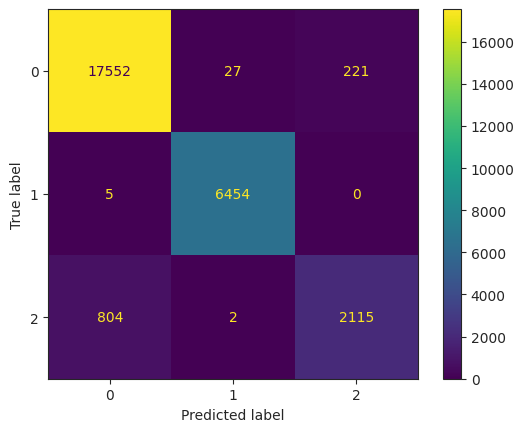

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cfm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

Dari confusion matrix di atas dapat disimpulkan bahwa :
- Terdapat 17.552 data galaksi yang diprediksi benar sebagai galaksi, 27 data galaksi yang diprediksi sebagai bintang, dan 221 data galaksi yang diprediksi sebagai quasar.
- Terdapat 6.454 data bintang yang diprediksi benar sebagai bintang, 5 data bintang yang terprediksi sebagai galaksi
- Terdapat 2.115 data quasar yang diprediksi benar sebagai quasar, 804 data quasar yang diprediksi sebagai galaksi, dan 2 data quasar yang diprediksi sebagai bintang.

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17800
           1       1.00      1.00      1.00      6459
           2       0.91      0.72      0.80      2921

    accuracy                           0.96     27180
   macro avg       0.95      0.90      0.92     27180
weighted avg       0.96      0.96      0.96     27180



## Logistic Regression

### Confusion Matrix

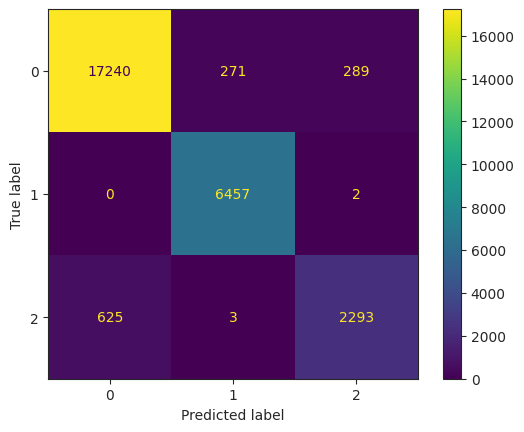

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cfm = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
plt.show()

Dari confusion matrix di atas dapat disimpulkan bahwa :
- Terdapat sekitar 17.240 data galaksi yang diprediksi benar sebagai galaksi, 289 data galaksi yang diprediksi sebagai bintang, dan 289 data galaksi yang dipredeksi sebagai quasar.
- Terdapat 6.457 data bintang yang diprediksi benar sebagai bintang, 0 data bintang yang terprediksi sebagai galaksi, dan 2 data yang terprediksi sebagai quasar
- Terdapat 2.293 data quasar yang diprediksi benar sebagai quasar, 625 data quasar yang diprediksi sebagai galaksi, dan 3 data quasar yang diprediksi sebagai bintang.

### Classification report

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17800
           1       0.96      1.00      0.98      6459
           2       0.89      0.79      0.83      2921

    accuracy                           0.96     27180
   macro avg       0.94      0.92      0.93     27180
weighted avg       0.96      0.96      0.96     27180



## Perbandingan Akurasi Random Forest, Decision Tree, dan Gaussian Naive Bayes

In [ ]:
acc_score = [['Random Forest', (score1_test*100)], ['Decision Tree', (score2_test*100)], ['Logistic Regression', (score3_test*100)]]
acc_score_df = pd.DataFrame(acc_score, columns=['Algoritma', 'Accuracy Score'])
acc_score_df

Algoritma  Accuracy Score
0        Random Forest       96.924209
1        Decision Tree       96.103753
2  Logistic Regression       95.621781

# **KESIMPULAN**

- Feature yang paling penting atau berpengaruh pada klasifikasi objek langit adalah redshift.
- Algoritma machine learning yang performanya paling bagus adalah Random Forest
dengan akurasi 96.92%

# Menyimpan data ke dalam bentuk csv

In [ ]:
df2 = df
df2['class'].replace([0, 1, 2],['GALAXY', 'STAR', 'QUASAR'], inplace=True)
#simpan data cleaning ke csv
data_cleaning = 'data_cleaning.csv'
df2.to_csv(data_cleaning, index=False)
print(f'Data telah disimpan ke dalam {data_cleaning}')


Data telah disimpan ke dalam data_cleaning.csv


In [ ]:
star_train_test = {'Algoritma' : ['Random Forest', 'Decision Tree', 'Logistic Regression'],
        'Accuracy Testing Data' : [96.924209, 96.103753, 95.622],
        'Accuracy Training Data' : [97.01, 96.260, 95.635 ]
}

df_star_train_test = pd.DataFrame(star_train_test)
#simpan data cleaning ke csv
data_model = 'data_train_test.csv'
df_star_train_test.to_csv(data_model, index=False)
print(f'Data telah disimpan ke dalam {data_model}')

Data telah disimpan ke dalam data_train_test.csv


In [ ]:
star_class_report = {'Algoritma' : ['Random Forest', 'Decision Tree', 'Logistic Regression'],
                     'Mean Precision' : [0.96667, 0.93, 0.94],
                     'Mean Recall Score' : [0.95333, 0.94, 0.92],
                     'Mean f-1 score' : [0.96, 0.93666, 0.94 ]
}
df_star_class_report = pd.DataFrame(star_class_report)
#simpan data cleaning ke csv
data_model2 = 'data_class_report.csv'
df_star_class_report.to_csv(data_model2, index=False)
print(f'Data telah disimpan ke dalam {data_model2}')

Data telah disimpan ke dalam data_class_report.csv
